<a href="https://colab.research.google.com/github/Al-x-R/Colab-examples/blob/master/tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import tensorflow as tf

In [0]:
input_value = tf.constant(1.0)

In [0]:
graph = tf.get_default_graph()

In [0]:
graph.get_operations()[0].node_def # подробное описание 

name: "Const"
op: "Const"
attr {
  key: "dtype"
  value {
    type: DT_FLOAT
  }
}
attr {
  key: "value"
  value {
    tensor {
      dtype: DT_FLOAT
      tensor_shape {
      }
      float_val: 1.0
    }
  }
}

In [0]:
input_value

<tf.Tensor 'Const_1:0' shape=() dtype=float32>

In [0]:
session1 = tf.Session()
session1.run(input_value)

1.0

In [0]:
weight = tf.Variable(0.8)

In [0]:
#graph.get_operations()

In [0]:
output_value = weight * input_value

In [0]:
#graph.get_operations()

In [0]:
session1.run(tf.initialize_all_variables())
session1.run(output_value)

0.8

In [0]:
x = tf.constant(1.5, name='input')
w = tf.Variable(0.8, name='weight')
y = tf.multiply(w, x)

In [0]:
y_ = tf.constant(0.32, name='target')

In [0]:
loss = (y - y_)**2

In [0]:
optim = tf.train.GradientDescentOptimizer(learning_rate=0.01)

In [0]:
grads_and_vars = optim.compute_gradients(loss)
session2 = tf.Session()
session2.run(tf.initialize_all_variables())
session2.run(grads_and_vars[0][1])

0.8

In [0]:
session2.run(optim.apply_gradients(grads_and_vars))
print(session2.run(w), session2.run(y))

0.7736 1.1603999


In [0]:
train_step = tf.train.GradientDescentOptimizer(0.01).minimize(loss)
for i in range(100):
  session2.run(train_step)
session2.run(y)

0.3284105

In [0]:
mnist = tf.keras.datasets.mnist

In [0]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [0]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


In [0]:
X_train = X_train / 255.0 * 0.99 + 0.01
X_test = X_test / 255.0 * 0.99 + 0.01

In [0]:
model = tf.keras.models.Sequential([
                    tf.keras.layers.Flatten(input_shape=(28, 28)),
                    tf.keras.layers.Dense(128, activation='relu'),
                    tf.keras.layers.Dropout(0.2),
                    tf.keras.layers.Dense(10, activation='softmax')
])

In [0]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [0]:
model.fit(X_train, y_train, epochs=15)
model.evaluate(X_test, y_test, verbose=2)

Train on 60000 samples
Epoch 1/15
60000/60000 [==============================] - 5s 90us/sample - loss: 0.3027 - acc: 0.9128
Epoch 2/15
60000/60000 [==============================] - 5s 84us/sample - loss: 0.1472 - acc: 0.9563
Epoch 3/15
60000/60000 [==============================] - 6s 93us/sample - loss: 0.1110 - acc: 0.9662
Epoch 4/15
60000/60000 [==============================] - 5s 88us/sample - loss: 0.0908 - acc: 0.9716
Epoch 5/15
60000/60000 [==============================] - 5s 83us/sample - loss: 0.0784 - acc: 0.9758
Epoch 6/15
60000/60000 [==============================] - 5s 90us/sample - loss: 0.0682 - acc: 0.9781
Epoch 7/15
60000/60000 [==============================] - 5s 88us/sample - loss: 0.0604 - acc: 0.9808
Epoch 8/15
60000/60000 [==============================] - 6s 93us/sample - loss: 0.0561 - acc: 0.9819
Epoch 9/15
60000/60000 [==============================] - 5s 91us/sample - loss: 0.0512 - acc: 0.9827
Epoch 10/15
60000/60000 [==============================] - 

[0.07618292646016125, 0.9799]

In [0]:
import matplotlib.pyplot as plt


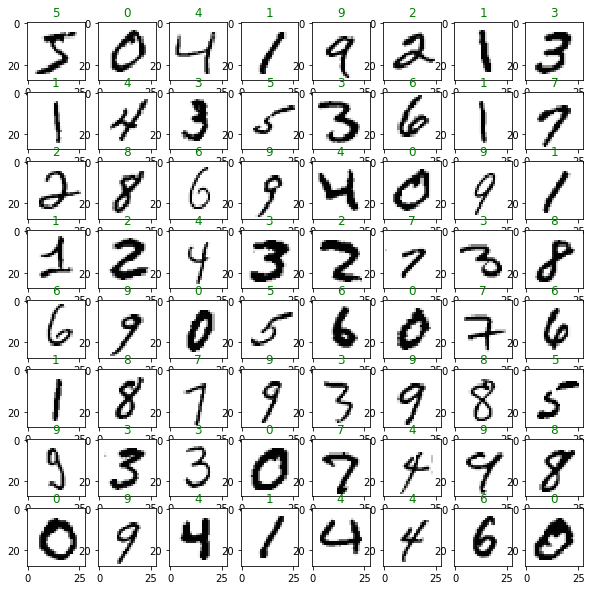

In [0]:
n = 8
fig, axs = plt.subplots(n, n, figsize=(10, 10))
for i in range(n):
  for j in range(n):
    arr = X_train[n*i+j]
    axs[i, j].imshow(arr, cmap='Greys')
    axs[i, j].set_title(y_train[n*i+j], c='green')

In [0]:
import imageio
import numpy as np
import cv2

In [0]:
image = imageio.imread('Image013.png', as_gray=True)
def image_resize(image, width = None, height = None, inter = cv2.INTER_AREA):
    # initialize the dimensions of the image to be resized and
    # grab the image size
    dim = None
    (h, w) = image.shape[:2]

    # if both the width and height are None, then return the
    # original image
    if width is None and height is None:
        return image

    # check to see if the width is None
    if width is None:
        # calculate the ratio of the height and construct the
        # dimensions
        r = height / float(h)
        dim = (int(w * r), height)

    # otherwise, the height is None
    else:
        # calculate the ratio of the width and construct the
        # dimensions
        r = width / float(w)
        dim = (width, int(h * r))

    # resize the image
    resized = cv2.resize(image, dim, interpolation = inter)

    return resized

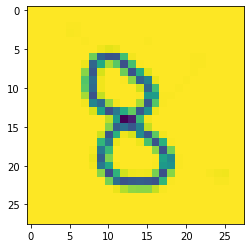

In [0]:
#img_arr = imageio.imread('Image006.png', as_gray=True)
img_arr = image_resize(image, width = 28, height = 28, inter = cv2.INTER_AREA)
#print(img_arr)
plt.imshow(image_resize(image, width = 28, height = 28, inter = cv2.INTER_AREA));

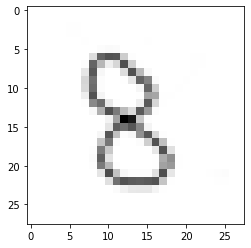

In [0]:
img_arr_ = (255 - img_arr) / 255 * 0.99 + 0.01 #делаем 255 нулями
#print(img_arr_)
plt.imshow(img_arr_, cmap='Greys');

In [0]:
result = model.predict(img_arr_.reshape(1, 28, 28)).flatten()
print(result)

[9.97193201e-05 5.93321020e-05 1.25125265e-02 4.91261343e-03
 5.87589573e-03 2.23988891e-02 7.99243990e-03 1.12499911e-04
 9.45686162e-01 3.49962269e-04]


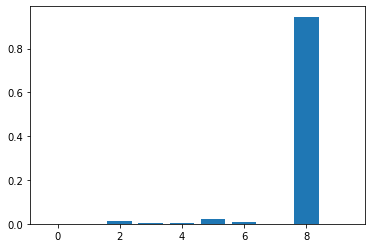

In [0]:
#import numpy as np
plt.bar(x=np.arange(10), height=result);